In [93]:
import copy 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import IESDS
import order_k
import BFPSNS
import Linear_programming

import nashpy as nash

# this module contains the data
import hst 

## Opgave 2:

##### 2.1 Argument ́er for, at spillet kan modelleres som et nulsumsspil, opstil spillet, og find alle strengt dominerede strategier.

In [94]:
dat, playrates = hst.read_data()

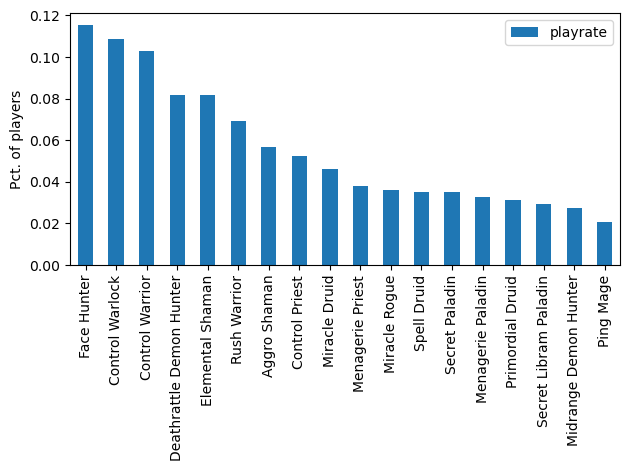

In [95]:
ax=playrates.plot.bar(ylabel='Pct. of players'); 
ax.set_xticklabels(playrates.deck); 
plt.tight_layout(); 

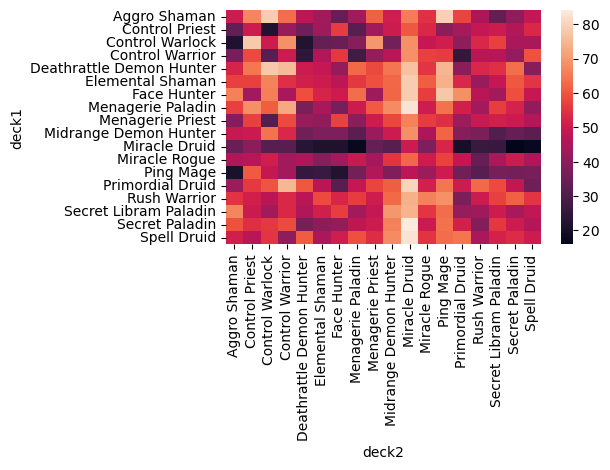

In [96]:
rows = dat.index.get_level_values('deck1')
cols = dat.columns
decks = rows
sns.heatmap(dat, xticklabels=cols, yticklabels=rows); 
plt.tight_layout(); 

In [97]:
decks

Index(['Aggro Shaman', 'Control Priest', 'Control Warlock', 'Control Warrior',
       'Deathrattle Demon Hunter', 'Elemental Shaman', 'Face Hunter',
       'Menagerie Paladin', 'Menagerie Priest', 'Midrange Demon Hunter',
       'Miracle Druid', 'Miracle Rogue', 'Ping Mage', 'Primordial Druid',
       'Rush Warrior', 'Secret Libram Paladin', 'Secret Paladin',
       'Spell Druid'],
      dtype='object', name='deck1')

In [98]:
U1 = dat.values # numpy array 
U2 = -dat.values

In [99]:
u1, u2, aa1, aa2 = IESDS.IESDS(U1, U2)

a=9 is strictly dominated by a=4
a=10 is strictly dominated by a=0
a=11 is strictly dominated by a=5
a=12 is strictly dominated by a=4
a=9 is strictly dominated by a=4
a=10 is strictly dominated by a=0
a=11 is strictly dominated by a=5
a=12 is strictly dominated by a=4
No further strategies to delete after 1 iterations


In [100]:
na1,na2 = U1.shape 
aa_dominated = [a for a in range(na2) if a not in aa1] # FILL IN: based on aa1 
print(f'Dominated strategies: {decks[aa_dominated]}')

Dominated strategies: Index(['Midrange Demon Hunter', 'Miracle Druid', 'Miracle Rogue', 'Ping Mage'], dtype='object', name='deck1')


### 2.

In [101]:
U1 = dat.iloc[aa1, aa2].values
U2 = -U1
non_dom_decks = decks[aa1]

for i in range(11):
    if i > 0:
        print(f"{i}th order rational player plays: {non_dom_decks[order_k.order_k_rationality(U1, U2, i) > 0][0]}")

1th order rational player plays: Deathrattle Demon Hunter
2th order rational player plays: Spell Druid
3th order rational player plays: Control Warrior
4th order rational player plays: Deathrattle Demon Hunter
5th order rational player plays: Spell Druid
6th order rational player plays: Control Warrior
7th order rational player plays: Deathrattle Demon Hunter
8th order rational player plays: Spell Druid
9th order rational player plays: Control Warrior
10th order rational player plays: Deathrattle Demon Hunter


### 3.

In [102]:
U1 = dat.values
U2 = -dat.values

playrates1 = playrates.copy()

playrates_sorted = playrates1.sort_values(by='deck', ascending=True)
playrates_values= playrates_sorted.values

expected_payoffs = U1 @ playrates_values[:, 1]
max_index = np.argmax(expected_payoffs)
print(decks[max_index])

Deathrattle Demon Hunter


### 4.

In [103]:
U1 = dat.iloc[aa1, aa2].values
U2 = -U1

pure_res = BFPSNS.nash_eq_brute_force(U1, U2)

print(f'Pure strategies: {pure_res}')

Pure strategies: []


In [107]:
mixed_res = Linear_programming.solve_by_LP(U1)
print(f'Mixed strategies: {mixed_res}')

Mixed strategies: [0.         0.         0.         0.         0.         0.
 0.21692068 0.         0.10770075 0.1100597  0.41684332 0.
 0.         0.14847556]


In [109]:
# payoff for column‐player is U2 = -U1
M = U2.T.copy()             # shape (n,n)
min_entry = M.min()
K = -min_entry if min_entry < 0 else 0

# shift so all entries >= 0
M_shifted = M + K

# now call your LP‐solver exactly as is:
q = Linear_programming.solve_by_LP(M_shifted)
print("Column mix:", q)


Column mix: [0.         0.         0.         0.         0.         0.
 0.21405817 0.         0.10038259 0.11188337 0.42044213 0.
 0.         0.15323374]
